<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KJW_Final_Project_DS620" data-toc-modified-id="KJW_Final_Project_DS620-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KJW_Final_Project_DS620</a></span></li><li><span><a href="#Clean-and-Prep-for-Text-Analysis" data-toc-modified-id="Clean-and-Prep-for-Text-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean and Prep for Text Analysis</a></span></li><li><span><a href="#Credits" data-toc-modified-id="Credits-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Credits</a></span></li></ul></div>

### KJW_Final_Project_DS620

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import heapq
import nltk
import gensim
from gensim import similarities, corpora, models
from gensim.similarities.docsim import Similarity
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim.corpora import Dictionary
from gensim.similarities import MatrixSimilarity, Similarity
from gensim.utils import lemmatize
from gensim.models import TfidfModel
from nltk.tokenize import word_tokenize, sent_tokenize

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
stop = stopwords.words('english')

from collections import Counter
import string
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
edge_list_1=pd.read_csv('ds620_project_groups.csv',header=0)
edge_list_1

,Student1,Student2
0,Vanita Thompson,Mael Illien
1,Vanita Thompson,Jeremy O'Brien
2,Jeremy O'Brien,Mael Illien
3,Simon Ustoyev,Murat Akyildirim
4,Simon Ustoyev,Elina Azrilyan
5,Simon Ustoyev,Jack Russo
6,Murat Akyildirim,Jack Russo
7,Murat Akyildirim,Elina Azrilyan
8,Elina Azrilyan,Jack Russo
9,Zachary Alexander,Amber Ferger


In [3]:
g_project=nx.Graph()
g_project.add_edges_from(zip(edge_list_1['Student1'], edge_list_1['Student2']), label='project_group')

In [4]:
g_project.nodes()

NodeView(('Vanita Thompson', 'Mael Illien', "Jeremy O'Brien", 'Simon Ustoyev', 'Murat Akyildirim', 'Elina Azrilyan', 'Jack Russo', 'Zachary Alexander', 'Amber Ferger', 'Mikhail Kollontai', 'Subhalaxmi Rout', 'Mia Chen', 'Wei Zhou', 'Habib Khan', 'Priya Shaji', 'Abdellah Ait Elmouden\xa0', 'Vijaya Cherukuri', 'Abdellah Ait Elmouden', 'Sheryl Piechocki', 'Jit Seneviratne', 'Ken Popkin', 'Jagdish Chhabria', 'Willie Smalls'))

In [5]:
g_project.add_node('Steven Ellingson')

In [6]:
g_project.nodes()

NodeView(('Vanita Thompson', 'Mael Illien', "Jeremy O'Brien", 'Simon Ustoyev', 'Murat Akyildirim', 'Elina Azrilyan', 'Jack Russo', 'Zachary Alexander', 'Amber Ferger', 'Mikhail Kollontai', 'Subhalaxmi Rout', 'Mia Chen', 'Wei Zhou', 'Habib Khan', 'Priya Shaji', 'Abdellah Ait Elmouden\xa0', 'Vijaya Cherukuri', 'Abdellah Ait Elmouden', 'Sheryl Piechocki', 'Jit Seneviratne', 'Ken Popkin', 'Jagdish Chhabria', 'Willie Smalls', 'Steven Ellingson'))

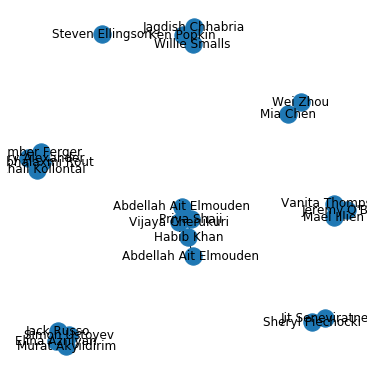

In [7]:
plt.figure(figsize=(5,5))
nx.draw(g_project, with_labels=1)
#nx.draw_random(g, with_labels=1)  

In [8]:
discussion_df=pd.read_csv("DS620_Discussion_Data_Final.csv")
#discussion_df=pd.read_csv("DS620_Discussion_Board_Data.csv")

In [9]:
#discussion_df.head()
discussion_df.iloc[1,:]

Thread_Name                                                       Google Ads
Initial_Post_or_Comment                                                    2
Author                                                     Zachary Alexander
Response_To                                                  Vanita Thompson
Thread_Content             Hi Vanita -- I definitely agree that Google Ad...
Name: 1, dtype: object

In [10]:
len(discussion_df)
discussion_df.shape

(379, 5)

In [11]:
#discussion_df_new=discussion_df[discussion_df.Author!=discussion_df.Response_To]
discussion_df_new=discussion_df[discussion_df.Initial_Post_or_Comment==2]

In [12]:
discussion_df_new.shape

(196, 5)

In [13]:
edge_list_2=discussion_df_new.iloc[:,2:4]

In [14]:
edge_list_2.columns = ["Node1","Node2"]
edge_list_2.shape

(196, 2)

In [15]:
edge_list_2

,Node1,Node2
1,Zachary Alexander,Vanita Thompson
3,Abdellah Ait Elmouden,Vijaya Cherukuri
4,Murat Akyildirim,Vijaya Cherukuri
5,Jeremy O'Brien,Vijaya Cherukuri
7,Ken Popkin,Priya Shaji
8,Priya Shaji,Ken Popkin
10,Elina Azrilyan,Mikhail Kollontai
11,Sheryl Piechocki,Mikhail Kollontai
13,Jagdish Chhabria,Abdellah Ait Elmouden
15,Priya Shaji,Ken Popkin


In [16]:
edge_list_new=pd.DataFrame(edge_list_2.groupby(["Node1","Node2"]).size().reset_index(name = "Weight"))
edge_list_new

,Node1,Node2,Weight
0,Abdellah Ait Elmouden,Habib Khan,1
1,Abdellah Ait Elmouden,Jack Russo,1
2,Abdellah Ait Elmouden,Ken Popkin,1
3,Abdellah Ait Elmouden,Mael Illien,1
4,Abdellah Ait Elmouden,Mikhail Kollontai,1
5,Abdellah Ait Elmouden,Priya Shaji,2
6,Abdellah Ait Elmouden,Subhalaxmi Rout,1
7,Abdellah Ait Elmouden,Vijaya Cherukuri,2
8,Abdellah Ait Elmouden,Zachary Alexander,1
9,Amber Ferger,Abdellah Ait Elmouden,1


In [17]:
len(edge_list_new)

140

In [18]:
##edge_list_temp.Weight=discussion_df_new.groupby(["Author","Response_To"])['Thread_Content'].count().reset_index()

In [19]:
g_discussion=nx.Graph()
g_discussion.add_weighted_edges_from(zip(edge_list_new['Node1'], edge_list_new['Node2'], edge_list_new['Weight']),label='discussion_comments')

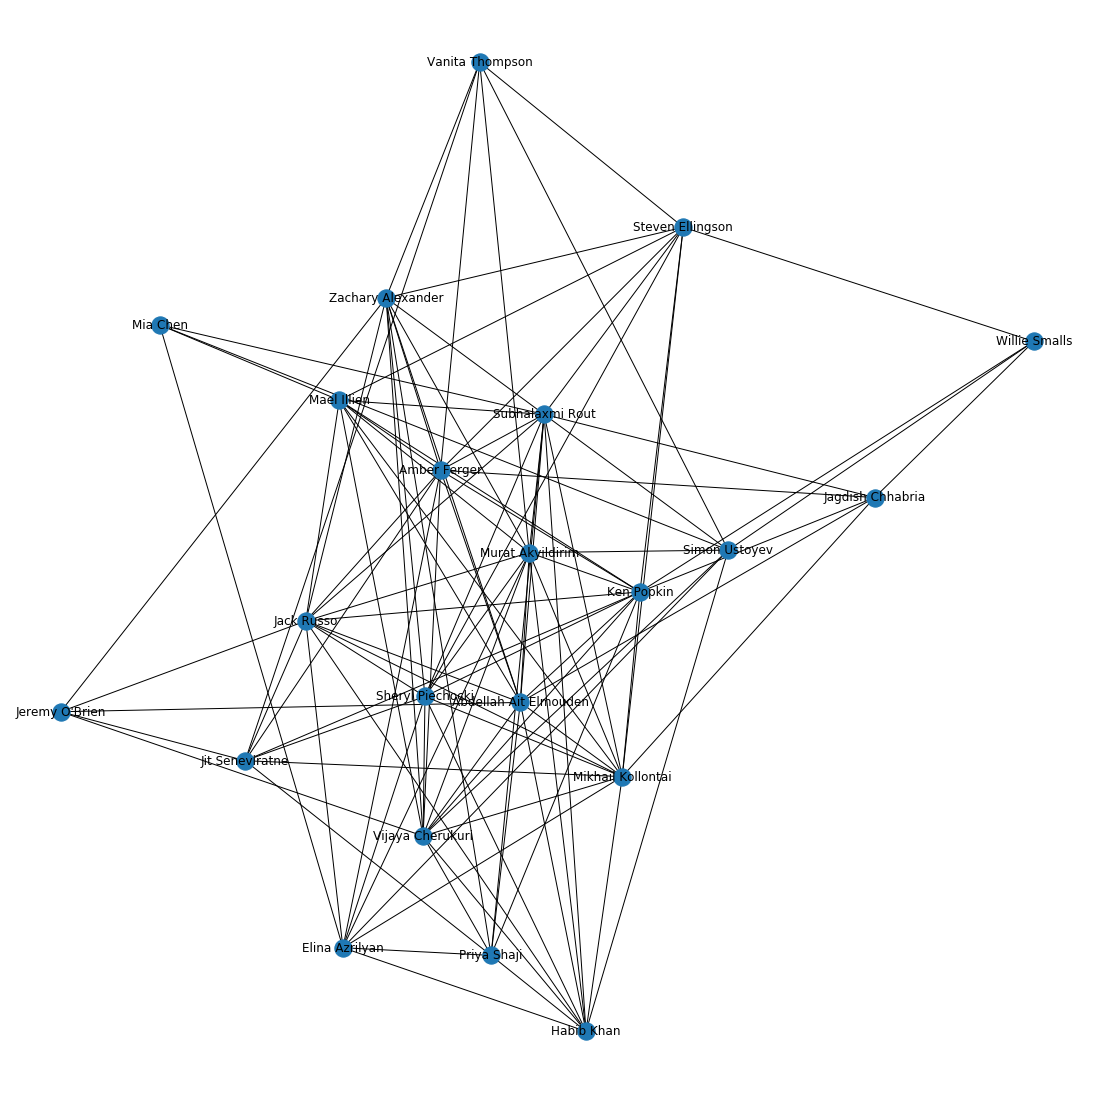

In [20]:
plt.figure(figsize=(15,15))
nx.draw(g_discussion, with_labels=1)

In [21]:
g_discussion.edges(data='weight')

EdgeDataView([('Abdellah Ait Elmouden', 'Habib Khan', 1), ('Abdellah Ait Elmouden', 'Jack Russo', 1), ('Abdellah Ait Elmouden', 'Ken Popkin', 3), ('Abdellah Ait Elmouden', 'Mael Illien', 2), ('Abdellah Ait Elmouden', 'Mikhail Kollontai', 3), ('Abdellah Ait Elmouden', 'Priya Shaji', 1), ('Abdellah Ait Elmouden', 'Subhalaxmi Rout', 1), ('Abdellah Ait Elmouden', 'Vijaya Cherukuri', 1), ('Abdellah Ait Elmouden', 'Zachary Alexander', 1), ('Abdellah Ait Elmouden', 'Amber Ferger', 1), ('Abdellah Ait Elmouden', 'Jagdish Chhabria', 1), ('Abdellah Ait Elmouden', "Jeremy O'Brien", 1), ('Abdellah Ait Elmouden', 'Murat Akyildirim', 2), ('Habib Khan', 'Elina Azrilyan', 1), ('Habib Khan', 'Jack Russo', 1), ('Habib Khan', 'Mikhail Kollontai', 2), ('Habib Khan', 'Murat Akyildirim', 1), ('Habib Khan', 'Priya Shaji', 1), ('Habib Khan', 'Sheryl Piechocki', 1), ('Habib Khan', 'Subhalaxmi Rout', 1), ('Habib Khan', 'Vijaya Cherukuri', 2), ('Habib Khan', 'Simon Ustoyev', 1), ('Jack Russo', 'Amber Ferger', 3),

In [22]:
#discussion_df.Combined=discussion_df.Thread_Name+" "+discussion_df.Thread_Content
discussion_df['Combined'] = discussion_df[['Thread_Name', 'Thread_Content']].apply(lambda x: ' '.join(x), axis=1)

In [23]:
discussion_df.Combined[0]

"Google Ads Google Ads provides analytic reporting on how people use a website.\xa0Google Analytics tracks what people do after clicking an ad.\xa0It traces\xa0and provides information on how people found a particular website, and how the website was explored.\xa0 Using the information,\xa0a website owner can identify trends and generate ideas to enhance their website. For example,\xa0you can learn how much time is spent on a site, what items were browsed, and what items were placed in the cart. Those factors can provide leads on enhancing customers' experience, which in turn can help increase\xa0conversions\xa0like sales and\xa0return on ad spend."

In [24]:
discussion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Thread_Name              379 non-null    object
 1   Initial_Post_or_Comment  379 non-null    int64 
 2   Author                   379 non-null    object
 3   Response_To              379 non-null    object
 4   Thread_Content           379 non-null    object
 5   Combined                 379 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.9+ KB


In [25]:
discussion_df.head(2)

,Thread_Name,Initial_Post_or_Comment,Author,Response_To,Thread_Content,Combined
0,Google Ads,1,Vanita Thompson,Vanita Thompson,Google Ads provides analytic reporting on how ...,Google Ads Google Ads provides analytic report...
1,Google Ads,2,Zachary Alexander,Vanita Thompson,Hi Vanita -- I definitely agree that Google Ad...,Google Ads Hi Vanita -- I definitely agree tha...


In [26]:
discussion_text=discussion_df.iloc[:,[2,5]]

In [27]:
#discussion_text.head()
len(discussion_text)

379

In [28]:
#discussion_text[discussion_text.Author=='Jagdish Chhabria']
len(str(discussion_text[discussion_text.Author=='Jagdish Chhabria'].Combined))

884

In [29]:
#discussion_text_new = pd.DataFrame(discussion_text.groupby('Author').agg({'Combined':lambda x: ', '.join(x)}))
discussion_text_new = pd.DataFrame(discussion_text.groupby('Author').agg({'Combined':lambda x: ', '.join(x)}).reset_index())

In [30]:
pd.set_option('display.max_colwidth', -1)

In [31]:
len(discussion_text_new)

22

In [32]:
len(str(discussion_text_new[discussion_text_new.Author=='Jagdish Chhabria'].Combined))
#discussion_text_new.head()

13117

In [33]:
#discussion_text_new.Combined[0]
#discussion_text_new.Author
node=discussion_text_new.Author
node.Name ='Node_Name'
node

0     Abdellah Ait Elmouden
1     Amber Ferger         
2     Elina Azrilyan       
3     Habib Khan           
4     Jack Russo           
5     Jagdish Chhabria     
6     Jeremy O'Brien       
7     Jit Seneviratne      
8     Ken Popkin           
9     Mael Illien          
10    Mia Chen             
11    Mikhail Kollontai    
12    Murat Akyildirim     
13    Priya Shaji          
14    Sheryl Piechocki     
15    Simon Ustoyev        
16    Steven Ellingson     
17    Subhalaxmi Rout      
18    Vanita Thompson      
19    Vijaya Cherukuri     
20    Willie Smalls        
21    Zachary Alexander    
Name: Author, dtype: object

In [34]:
#discussion_text_new = discussion_text_new.drop('Tokens', 1)
#discussion_text_new = discussion_text_new.drop('Word_Tokens', 1)
#discussion_text_new = discussion_text_new.drop('Sentence_Tokens', 1)
#discussion_text_new
#discussion_text_new.Combined[0]

In [35]:
#Functions used below to clean data
def remove_stop_words(inclean):
    stop_words = stopwords.words('english')
    words = inclean.split()
    outclean = ''
    
    for word in words:
        if word not in stop_words:
            outclean = outclean + ' ' + word
    
    return outclean
    
def remove_common_words(inclean):
    words = inclean.split()
    outclean = ''
    
    for word in words:
        if word not in common_words:
            outclean = outclean + ' ' + word
    
    return outclean

def remove_url(inclean):
    outclean = re.sub(r"http\S+", "", inclean) 
    
    return outclean

In [36]:
sentence_tokens=pd.Series(str(list()))
sentences=[]
sentence_tokens[0] = nltk.sent_tokenize(discussion_text_new.Combined[0])
len(sentence_tokens[0])
for sent in sentence_tokens[0]:
     sentences.append(nltk.word_tokenize(sent))
sentences

[['Marketing', 'Analytics', 'in', 'Healthcare', 'Right', '.'],
 ['Data',
  'Analytics',
  'in',
  'the',
  'healthcare',
  'industry',
  'is',
  'changing',
  'the',
  'way',
  'patients',
  'and',
  'doctors',
  'handle',
  'care',
  '.'],
 ['The',
  'more',
  'data',
  'analytics',
  'involved',
  ',',
  'the',
  'more',
  'efficient',
  'healthcare',
  'can',
  'be.',
  ',',
  'General',
  'Electric',
  'GE',
  'use',
  'marketing',
  'analytics',
  'to',
  'track',
  'country',
  'of',
  'origin',
  'for',
  'their',
  'site',
  'users',
  '.'],
 ['This',
  'can',
  'provide',
  'GE',
  'with',
  'a',
  'rich',
  'insight',
  'into',
  'where',
  'market',
  'demands',
  'are',
  'arising',
  'and',
  'how',
  'to',
  'better',
  'cater',
  'their',
  'web',
  'pages',
  'to',
  'different',
  'languages',
  'and',
  'cultures',
  '.'],
 ['GM',
  'also',
  'is',
  'implementing',
  'a',
  'site',
  'analytics',
  'tool',
  'across',
  'its',
  'dealer',
  'network',
  '.'],
 ['The'

In [37]:
#word_tokens=pd.Series(str(list()))
sentences=[]
clean=[]
all_sentences=[]
discussion_text_new['Word_Tokens']=np.nan
discussion_text_new['Sentence_Tokens']=np.nan
tokenizer = nltk.RegexpTokenizer(r"\w+")

for i in range(len(discussion_text_new)):
    clean = discussion_text_new.Combined[i].lower()     #lower case
    clean = remove_stop_words(clean)
    clean = remove_url(clean)
    sentence_tokens[i] = nltk.sent_tokenize(clean)
    sentence_tokens[i] = (s.strip('.') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip(',') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip(':') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip(';') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip(' ') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip('-') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip(')') for s in sentence_tokens[i])
    sentence_tokens[i] = (s.strip('(') for s in sentence_tokens[i])
#   print(type(sentence_tokens[i]))
#   sentence_tokens[i] = tokenizer.tokenize(sentence_tokens[i])
#   sentence_tokens[i] = nltk.sent_tokenize(sentence_tokens[i])
#   sentence_tokens[i] = nltk.sent_tokenize(discussion_text_new.Combined[i])
discussion_text_new["Sentence_Tokens"]=sentence_tokens

#    print(f'Tokenining {discussion_text_new.Author[i]}')
#    len(sentence_tokens[0])
for i in range(len(discussion_text_new)):
    sentences=[]
    for sent in discussion_text_new["Sentence_Tokens"][i]:
        sentences.append(nltk.word_tokenize(sent))
        all_sentences.append(nltk.word_tokenize(sent))
    discussion_text_new["Word_Tokens"][i]=sentences
        

In [38]:
#discussion_text_new.head(1)

In [39]:
#len(all_sentences)
#all_sentences

In [40]:
length=0
total_length=0
all_sents=[]
# word_tokens[i]
for i in range(len(discussion_text_new)):
    length = len(discussion_text_new["Word_Tokens"][i])
    total_length=total_length+length
    print(f"{discussion_text_new['Author'][i]} has {length} sentences")
print(total_length)

Abdellah Ait Elmouden has 61 sentences
Amber Ferger has 158 sentences
Elina Azrilyan has 61 sentences
Habib Khan has 53 sentences
Jack Russo has 37 sentences
Jagdish Chhabria has 65 sentences
Jeremy O'Brien has 36 sentences
Jit Seneviratne has 68 sentences
Ken Popkin has 70 sentences
Mael Illien has 95 sentences
Mia Chen has 20 sentences
Mikhail Kollontai has 85 sentences
Murat Akyildirim has 116 sentences
Priya Shaji has 63 sentences
Sheryl Piechocki has 73 sentences
Simon Ustoyev has 46 sentences
Steven Ellingson has 49 sentences
Subhalaxmi Rout has 139 sentences
Vanita Thompson has 48 sentences
Vijaya Cherukuri has 76 sentences
Willie Smalls has 46 sentences
Zachary Alexander has 101 sentences
1566


In [41]:
common_dictionary = Dictionary(all_sentences)
common_dictionary.token2id
common_corpus = [common_dictionary.doc2bow(sent) for sent in all_sentences]
#len(common_dictionary)
#len(common_corpus)
#common_dictionary.add_documents([["this", "is", "sparta"], ["just", "joking"]])


In [42]:
# THIS SECTION IS NOT USED SUBSEQUENTLY. IT IS EXPERIMENTAL CODE
#corpus=pd.Series(list())
#test_dict = gensim.corpora.Dictionary(discussion_text_new["Word_Tokens"][1])
#test_corpus = [common_dictionary.doc2bow(sent) for sent in discussion_text_new["Word_Tokens"][1]]
#test_corpus = [test_dict.doc2bow(sent) for sent in discussion_text_new["Word_Tokens"][1]]
#print(len(test_corpus))
#leng = len(discussion_text_new["Word_Tokens"][1])
#temp_tfidf = TfidfModel(test_corpus)
#corpus[1] = [common_dictionary.doc2bow(sent) for sent in discussion_text_new["Word_Tokens"][1]]
#test_corpus_tfidf = temp_tfidf[test_corpus]
#temp_sims = gensim.similarities.Similarity('~\KJW_Final_Project_DS620/',test_corpus_tfidf,num_features=len(test_dict))
#temp_sims[test_corpus_tfidf]
#sum_sims = (np.sum(temp_sims[test_corpus_tfidf]))
#avg_sims = sum_sims/leng


In [43]:
src_corpus_tfidf = pd.Series(list())
tgt_corpus_tfidf = pd.Series(list())
src_corpus = pd.Series(list())
tgt_corpus = pd.Series(list())
sims = pd.Series(list())
#sum_of_sims = pd.Series(list())
sum_of_sims = np.empty((22,22), dtype=float, order='C')
avg_similarity = np.empty((22,22), dtype=float, order='C')
model_tfidf = TfidfModel(common_corpus)
i=0

corpus=pd.Series(list())
for i in range(0,len(discussion_text_new)):
    src_corpus[i] = (common_dictionary.doc2bow(sent) for sent in discussion_text_new["Word_Tokens"][i])
    src_corpus_tfidf = model_tfidf[src_corpus[i]]
    sims[i] = gensim.similarities.Similarity('~\KJW_Final_Project_DS620/',src_corpus_tfidf,num_features=len(common_dictionary))
    #    for doc in corpus_tfidf:
    #        print([[common_dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])
#for similarities in sims:
    #print(similarities)
    length = len(discussion_text_new["Word_Tokens"][i])
    for j in range(0, len(discussion_text_new)):
        tgt_corpus[j] = (common_dictionary.doc2bow(sent) for sent in discussion_text_new["Word_Tokens"][j])
        tgt_corpus_tfidf = model_tfidf[tgt_corpus[j]]
        sum_of_sims[i][j] = round(np.sum(sims[i][tgt_corpus_tfidf]),4)
        avg_similarity[i][j] = round(sum_of_sims[i][j]/length,4)
print(sum_of_sims)
print(avg_similarity)

[[110.50900269  73.89099884  32.49300003  34.95059967  15.23509979
   33.52009964  17.33200073  27.58589935  42.26549911  44.03359985
    9.41819954  32.07040024  63.54190063  33.52959824  27.31360054
   26.30579948  19.53179932  77.42259979  22.55660057  47.68450165
   11.14579964  59.20059967]
 [ 73.89099884 497.04141235  82.10169983  76.76080322  43.88840103
   95.686203    43.40000153  79.97730255 107.47429657 116.26290131
   25.32439995  94.50050354 163.55130005  91.6085968   98.915802
   62.03509903  58.85250092 212.03889465  60.48690033 111.54679871
   34.88610077 163.68170166]
 [ 32.49300003  82.10169983 123.63379669  40.78950119  18.35440063
   34.85079956  16.50869942  34.54159927  39.91239929  47.9864006
   11.02750015  36.27909851  69.56510162  40.69670105  36.60520172
   31.88409996  24.62779999  86.99520111  29.46249962  44.64649963
   13.98950005  66.3690033 ]
 [ 34.95059967  76.76080322  40.78950119 125.68979645  14.91580009
   32.40520096  13.57830048  26.98760033  36.

In [44]:
tri_upper_no_diag = np.triu(sum_of_sims, k=1)

In [45]:
node1 = node2 = discussion_text_new["Author"]
edge_df = pd.DataFrame(data=tri_upper_no_diag, index=node1, columns=node2) 
edge_df

Author,Abdellah Ait Elmouden,Amber Ferger,Elina Azrilyan,Habib Khan,Jack Russo,Jagdish Chhabria,Jeremy O'Brien,Jit Seneviratne,Ken Popkin,Mael Illien,Mia Chen,Mikhail Kollontai,Murat Akyildirim,Priya Shaji,Sheryl Piechocki,Simon Ustoyev,Steven Ellingson,Subhalaxmi Rout,Vanita Thompson,Vijaya Cherukuri,Willie Smalls,Zachary Alexander
Author,,,,,,,,,,,,,,,,,,,,,,
Abdellah Ait Elmouden,0.0,73.890999,32.4930,34.950600,15.235100,33.520100,17.332001,27.585899,42.265499,44.033600,9.4182,32.070400,63.541901,33.529598,27.313601,26.305799,19.531799,77.422600,22.556601,47.684502,11.145800,59.200600
Amber Ferger,0.0,0.000000,82.1017,76.760803,43.888401,95.686203,43.400002,79.977303,107.474297,116.262901,25.3244,94.500504,163.551300,91.608597,98.915802,62.035099,58.852501,212.038895,60.486900,111.546799,34.886101,163.681702
Elina Azrilyan,0.0,0.000000,0.0000,40.789501,18.354401,34.850800,16.508699,34.541599,39.912399,47.986401,11.0275,36.279099,69.565102,40.696701,36.605202,31.884100,24.627800,86.995201,29.462500,44.646500,13.989500,66.369003
Habib Khan,0.0,0.000000,0.0000,0.000000,14.915800,32.405201,13.578300,26.987600,36.950802,41.736401,12.5604,36.711498,73.953300,33.592899,34.120701,26.694201,22.657200,76.691399,24.863400,53.990200,9.939000,64.092499
Jack Russo,0.0,0.000000,0.0000,0.000000,0.000000,18.621401,8.636500,16.936600,23.649599,24.100401,4.5001,21.637899,30.455400,15.436900,18.151400,13.300400,13.691000,36.665901,13.152100,17.237000,6.474900,34.408901
Jagdish Chhabria,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,19.369499,34.012100,50.103001,46.071400,12.4856,42.728401,74.875298,38.478802,32.242901,29.122601,25.854900,86.106499,27.527100,39.705502,17.709999,71.667503
Jeremy O'Brien,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,18.589100,26.814100,21.419100,6.8283,18.218000,38.403301,17.490801,17.699600,15.652700,12.744500,38.637600,10.625400,17.500401,8.969500,34.383900
Jit Seneviratne,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,38.647701,44.182800,10.4193,33.713200,63.692501,35.653099,34.397301,26.368000,20.022100,75.944801,30.709499,36.056400,12.991600,57.368099
Ken Popkin,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.944698,13.3196,54.919399,81.421997,45.222801,43.308399,34.328602,31.516001,93.159500,28.932600,47.406502,19.890900,84.667099


In [46]:
#newdf=pd.DataFrame(data=edge_df.where(pd.np.triu(pd.np.ones(edge_df.shape), k=1).astype(bool)).reset_index().stack(),columns=cols)
node1=[]
node2=[]
weight=[]
edge_data = edge_df.where(pd.np.triu(pd.np.ones(edge_df.shape), k=1).astype(bool)).stack()
#newdf['Abdellah Ait Elmouden']['Amber Ferger']
#print(len(newdf))
#print(newdf.values)
for i in range(0,len(edge_data)):
    node1.append(edge_data.index[i][0])
    node2.append(edge_data.index[i][1])
    weight.append(edge_data.values[i])
list_of_tuples = list(zip(node1, node2, weight)) 
newdf = pd.DataFrame(list_of_tuples, columns = ['Node1', 'Node2', 'Weight']) 
newdf


,Node1,Node2,Weight
0,Abdellah Ait Elmouden,Amber Ferger,73.890999
1,Abdellah Ait Elmouden,Elina Azrilyan,32.493000
2,Abdellah Ait Elmouden,Habib Khan,34.950600
3,Abdellah Ait Elmouden,Jack Russo,15.235100
4,Abdellah Ait Elmouden,Jagdish Chhabria,33.520100
5,Abdellah Ait Elmouden,Jeremy O'Brien,17.332001
6,Abdellah Ait Elmouden,Jit Seneviratne,27.585899
7,Abdellah Ait Elmouden,Ken Popkin,42.265499
8,Abdellah Ait Elmouden,Mael Illien,44.033600
9,Abdellah Ait Elmouden,Mia Chen,9.418200


In [47]:
g_lexsim=nx.Graph()
g_lexsim.add_weighted_edges_from(zip(newdf['Node1'], newdf['Node2'], newdf['Weight']),label='lexical similarity')

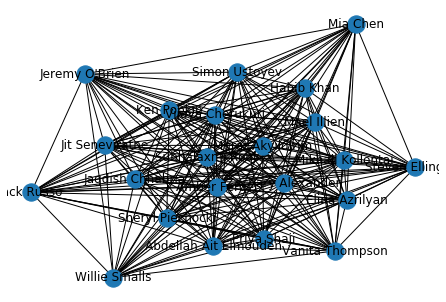

In [48]:
nx.draw(g_lexsim, with_labels=True)

### Clean and Prep for Text Analysis

In [49]:
#This dataframe has a row for each class member (author) that wrote at least one discussion post, or commented on an 
#existing post. There is one row per author, so an author who wrote 10 discussions and 10 replies has a single row
#that combines all their writing.

#discussion_text_new.head(1)

In [50]:
#Create a base metrics dataframe that captures some basic statistics (number of words, number of characters, average
#word length, and number of stopwords) about each author's posts
def avg_word_length(combined):
    words = combined.split()
    avg = sum(len(word) for word in words)/len(words)
    return avg

def stop_words_count(combined):
    count = 0
    words = combined.split()
    stop_words = stopwords.words('english')
    
    for w in words:
        if w in stop_words:
            count = count + 1
    
    return count

base_metrics = discussion_text_new

base_metrics = base_metrics.drop(['Combined','Tokens'], axis=1)

base_metrics['num_words'] = discussion_text_new.Combined.apply(lambda x: len(str(x).split(' ')))

base_metrics['num_chars'] = discussion_text_new.Combined.str.len()

base_metrics['avg_word_length'] = discussion_text_new.Combined.apply(lambda x: avg_word_length(x)) 

stop_words = stopwords.words('english')
base_metrics['stop_words_count'] = discussion_text_new.Combined.apply(lambda x: stop_words_count(x))

base_metrics = base_metrics.sort_values(['num_words'], ascending=False).reset_index(drop=True) 

print('Metrics for each author, sorted in descending order by number of words')
base_metrics.head()

KeyError: "['Tokens'] not found in axis"

In [ ]:
#Identify the most frequently occurring words across all the authors posts
everyones_text = ''
for text in discussion_text_new.Combined:
    everyones_text = everyones_text + ' ' + text.lower()

words = everyones_text.split()
words = Counter(words)
common_words = words.most_common(18)
common_words = [entries[0] for entries in common_words]
print(common_words)

In [ ]:
#Functions used below to clean data
def remove_stop_words(inclean):
    stop_words = stopwords.words('english')
    words = inclean.split()
    outclean = ''
    
    for word in words:
        if word not in stop_words:
            outclean = outclean + ' ' + word
    
    return outclean
    
def remove_common_words(inclean):
    words = inclean.split()
    outclean = ''
    
    for word in words:
        if word not in common_words:
            outclean = outclean + ' ' + word
    
    return outclean

def remove_url(inclean):
    outclean = re.sub(r"http\S+", "", inclean) 
    
    return outclean

In [ ]:
#Run each author's text thru the cleaning steps below, then add the cleaned data as a new column (combined_clean) to the
#discussion_new_text dataframe.
cleandf = discussion_text_new
cleandf = cleandf.drop('Tokens', 1)

clean_data_list = []
word_token_list = []
sentence_token_list = []

for text in cleandf.Combined:
    clean = text.lower()     #lower case
    
    clean = remove_stop_words(clean) #remove stop words
    
    clean = remove_common_words(clean) #remove the most common words
    
    clean = remove_url(clean)
    
    clean_data_list.append(clean)
    
    #remove punctuation and tokenize by word
    tokenizer = RegexpTokenizer(r'\w+')
    word_tokens = tokenizer.tokenize(clean)
    word_token_list.append(word_tokens)
    
    #remove punctuation and tokenize by sentence
    translator = str.maketrans('', '', string.punctuation)
    sentence_tokens = sent_tokenize(clean)
    sentence_tokens = [s.translate(translator) for s in sentence_tokens] 
    sentence_token_list.append(sentence_tokens)
    
cleandf['combined_clean'] = clean_data_list
cleandf['word_tokens'] = word_token_list
cleandf['sentence_tokens'] = sentence_token_list

In [ ]:
cleantext = discussion_text_new
cleantext = cleantext.drop('Tokens', 1)

clean_data_list = []
word_token_list = []
sentence_token_list = []
sentence_tokens=[]
word_tokens=[]

#for text in cleantext.Combined:
for text in cleantext.Combined[0]:
    clean = text.lower()     #lower case
    
    clean = remove_stop_words(clean) #remove stop words
    
    clean = remove_common_words(clean) #remove the most common words
    
    clean = remove_url(clean)
    
    clean_data_list.append(clean)

    sentence_tokens = sent_tokenize(clean)
    sentence_tokens = [s.translate(translator) for s in sentence_tokens] 
    sentence_token_list.append(sentence_tokens)
#    word_tokens = nltk.word_tokenize(sentence_tokens)
    print(sentence_tokens)

#cleantext['combined_clean'] = clean_data_list
#cleantext['word_tokens'] = word_tokens
#cleantext['sentence_tokens'] = sentence_tokens

In [ ]:
#Tokenize the sentence into words
    tokens = [word for word in sentence.split()]

    #Create dictionary
    dictionary = corpora.Dictionary([tokens])
    print(dictionary)

In [ ]:
cleandf.info()

In [ ]:
cleandf.head(1)

In [ ]:
cleandf.to_csv('cleaned_file_for_text_analysis.csv', index=False)

3)	Based on lexical similarity between the initial posts and comments thereon. For determining the lexical similarity, we propose to use Natural Language Processing (NLP). We are considering modelling this as a text network and using the textnet library. We’re also considering using NLTK and Gensim libraries for this, and calculating cosine similarity between the discussion threads.

In [ ]:
cleandf.word_tokens[0]

### Credits

1. We used this article from Analytics Vidyha titled [Ultimate Guide to Deal with Text Data](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/) to identify... <br>
a. base metrics to describe the data <br>
b. cleaning recommendations to ensure our data is in a ready state for similarity analysis.
<br><br>
2. This article, [What is Text Similarity in NLP,](https://rxnlp.com/what-is-text-similarity-nlp/#.XxDDZihKg2w) proved helpful for understanding lexical similarity and it's application.
<br><br>
3. This [StackOverflow link](https://stackoverflow.com/questions/24399820/expression-to-remove-url-links-from-twitter-tweet/24399874) enabled a simple regex means to remove URL's.